In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import networkx as nx
from sklearn.datasets import load_iris

In [2]:
iris = load_iris()
x = iris.data
y = iris.target

In [8]:
#相似度矩阵
similarity=np.zeros([150,150])
for i in range(150):
    a=x[i]
    for j in range(i+1,150):
        b=x[j]
        A=a-b
        similarity[i][j]=similarity[j][i]=np.exp(-np.matmul(A,A))
#阈值0.777
ttt=0.777
similarity[similarity<ttt]=0

In [9]:
#计算度数矩阵
Degree=np.zeros([150,150])
for i in range(150):
    Degree[i][i]=np.sum(similarity[i])

In [11]:
#计算拉普拉斯矩阵
Laplace=Degree-similarity

In [12]:
#用归一割计算非归一化对称拉普拉斯矩阵
Degree_sqrt=1/Degree
Degree_sqrt[Degree_sqrt==np.Inf]=0
toone_Laplace=np.matmul(Degree_sqrt,Laplace)

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: RuntimeWarning: divide by zero encountered in true_divide
  


In [13]:
#求非归一化对称拉普拉斯矩阵的特征值和特征向量
eigenvalue,eigenvector=np.linalg.eig(toone_Laplace)
temp=pd.Series(eigenvalue)

In [14]:
#选择最小的k个特征值对应的特征向量
mineigvector=eigenvector[:,[5,6,7,8,1,31,35,34,20,0,19,149,147,148,146,145,144]]
#单位化
for i in range(150):
    T=np.sqrt(np.matmul(mineigvector[i],mineigvector[i]))
    mineigvector[i]=mineigvector[i]/T

In [15]:
Laplace

array([[21.61697163,  0.        ,  0.        , ...,  0.        ,
         0.        ,  0.        ],
       [ 0.        , 15.21162557, -0.91393119, ...,  0.        ,
         0.        ,  0.        ],
       [ 0.        , -0.91393119, 19.39171551, ...,  0.        ,
         0.        ,  0.        ],
       ...,
       [ 0.        ,  0.        ,  0.        , ..., 10.14901979,
         0.        ,  0.        ],
       [ 0.        ,  0.        ,  0.        , ...,  0.        ,
         1.85569572,  0.        ],
       [ 0.        ,  0.        ,  0.        , ...,  0.        ,
         0.        ,  6.98017875]])

In [25]:
from sklearn.datasets.samples_generator import make_blobs
X, y = make_blobs(n_samples=150, centers=[(1,14),(7.5,1),(14,14)], n_features=2,cluster_std=[3.0,3.0,3.0],random_state=0,shuffle=False)
x=np.array(X)
data = similarity
data = np.array(data)
pos={}
#字典pos储存150个点的坐标
for i in range(1,151):
    pos[i]=x[i-1]

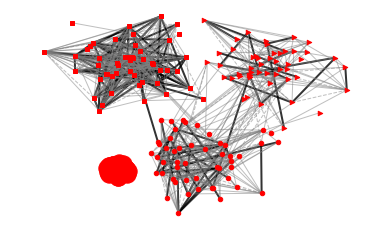

In [27]:
G = nx.Graph()
#参加节点
for i in range(1,151):
    G.add_node(i)
#参加边
for i in range(1,150):
    for j  in range(i,150):
        if data[i][j] != 0:
            G.add_edge(i,j,weight=data[i][j])
#按簇将节点区分         
nodes1=[i for i in range(1,51)]
nodes2=[i for i in range(51,101)]
nodes3=[i for i in range(101,151)]
#按权重将边区分
edge1 = [(u, v) for (u, v, d) in G.edges(data=True) if d['weight'] >= 0.9274]
edge2 = [(u, v) for (u, v, d) in G.edges(data=True) if (d['weight'] < 0.9274) & (d['weight'] > 0.8)]
edge3 = [(u, v) for (u, v, d) in G.edges(data=True) if d['weight'] <= 0.8]
#标记点
nx.draw_networkx_nodes(G, pos, node_size=20,nodelist=nodes1,node_shape='s')
nx.draw_networkx_nodes(G, pos, node_size=20,nodelist=nodes2,node_shape='o')
nx.draw_networkx_nodes(G, pos, node_size=20,nodelist=nodes3,node_shape='>')
#标记边
nx.draw_networkx_edges(G, pos, edgelist=edge1,alpha=0.8,
                       width=2)
nx.draw_networkx_edges(G, pos, edgelist=edge2,
                       width=1, alpha=0.5, edge_color='gray')
nx.draw_networkx_edges(G, pos, edgelist=edge3,
                       width=1, alpha=0.5, edge_color='gray', style='dashed')
nx.draw(G)

In [28]:
def dist_eclud(vecA,vecB):          #距离函数
    vec_square = [] 
    for element in vecA - vecB:     #两个向量中的每个元素相减
        element = element ** 2      #得到差的平方
        vec_square.append(element)
    return sum(vec_square) ** 0.5   #相加再开根号得欧式距离

In [29]:
def rand_cent(data_set,k):
    n = data_set.shape[1]           #数据维度 
    centroids = np.zeros((k,n))     #创建0矩阵
    for j in range(n):
        min_j = float(min(data_set[:,j]))       #所有数据某一维度的最小值
        range_j = float(max(data_set[:,j])) - min_j    #所有数据在这一维度的最大值
        centroids[:,j] = (min_j + range_j * np.random.rand(k,1))[:,0]   #在该范围内随机确定质心位置
    return centroids   #centroids质心

In [30]:
def Kmeans(data_set,k):             #输入数据集和要分成簇的数量
    m = data_set.shape[0]           #数据点的数量
    cluster_assment = np.zeros((m,2))   #创建m行2列的0矩阵，两列分别存储每个点所属的簇和该点距离所属质心的距离（即误差），矩阵中各点初始值为0，在下面的循环中更新数值
    centroids = rand_cent(data_set,k)   #创建随机初始质心
    cluster_changed = True
    while cluster_changed:              #如果cluster_changed为True，循环执行
        cluster_changed =False          #如果所有的数据点归属不再变化，while循环结束
        for i in range(m):      #对于数据集中的每个点
            min_dist = np.inf;min_index = -1        #np.inf表示正无穷，min_dist表示误差，即数据点与质心的距离，min_index表示每个点所属的簇，初始值为-1
            for j in range(k):          #对于k个现有质心分别计算数据点到这几个质心的距离并确定归属那个簇
                dist_ji = dist_eclud(centroids[j,:],data_set[i,:])      #计算距离
                if dist_ji < min_dist:              #min_dist初始值为正无穷，第一次执行该循环（即j=0），小于号一定成立，于是该数据点属于第一个簇，然后更新min_dist为该数据点的第一个质心的距离，再计算该数据点与第二个质心的距离（j=1）并比较
                    min_dist = dist_ji; min_dist = j    #更新点属于哪个簇
            if cluster_assment[i,0] != min_index:
                cluster_changed = True         #只要有一个数据点与上一次的分组结果不同，cluster_changed就为True，while循环就能继续执行
            cluster_assment[i,:] = min_index,min_dist**2        #cluster_assment矩阵的第i行数据更新为min_index，min_dist **2
        for cent in range(k):
            pts_inclust = data_set[np.nonzero(list(map(lambda x:x==cent,cluster_assment[:,0])))]       #获取第cent+1个簇中的所有数据点，存储到pts_inclust中
            centroids[cent,:] = np.mean(pts_inclust,axis = 0)           #计算质心坐标，axis=0表示按pts_inclust的列方向计算均值
    return centroids,cluster_assment